<a href="https://colab.research.google.com/github/Rushabh2568/Python-Lab/blob/master/cost_prediction_of_medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [79]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [80]:
insurance_dataset.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
insurance_dataset.shape

(1338, 7)

In [82]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
insurance_dataset.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

In [84]:
insurance_dataset.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


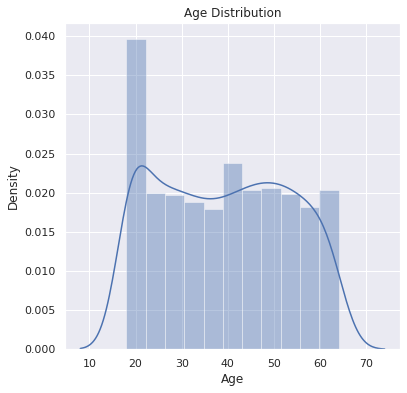

In [85]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Age'])
plt.title('Age Distribution')
plt.show()

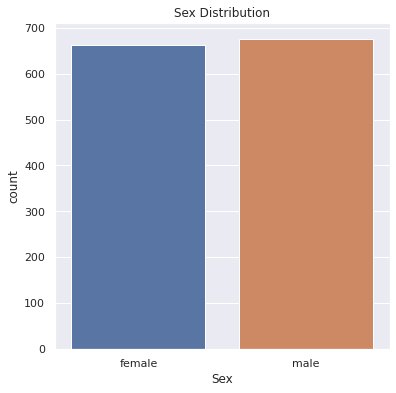

In [86]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [87]:
insurance_dataset['Sex'].value_counts()

male      676
female    662
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


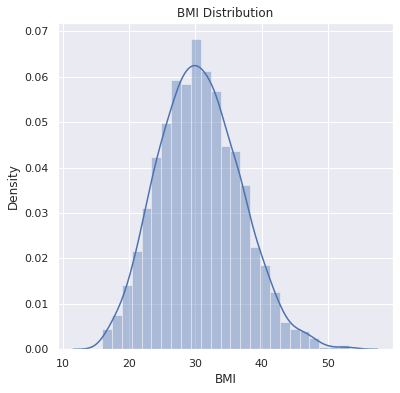

In [88]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['BMI'])
plt.title('BMI Distribution')
plt.show()

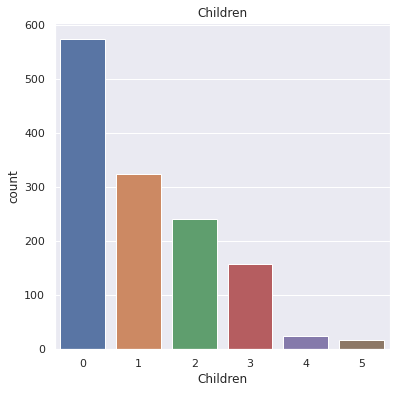

In [89]:
plt.figure(figsize=(6,6))
sns.countplot(x='Children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [90]:
insurance_dataset['Children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

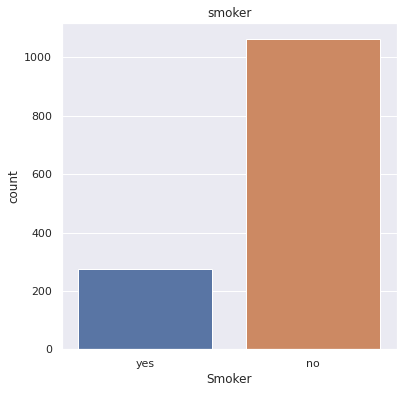

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(x='Smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [92]:
insurance_dataset['Smoker'].value_counts()

no     1064
yes     274
Name: Smoker, dtype: int64

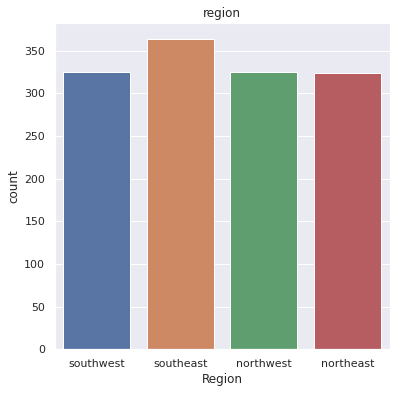

In [93]:
plt.figure(figsize=(6,6))
sns.countplot(x='Region', data=insurance_dataset)
plt.title('region')
plt.show()

In [94]:
insurance_dataset['Region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: Region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


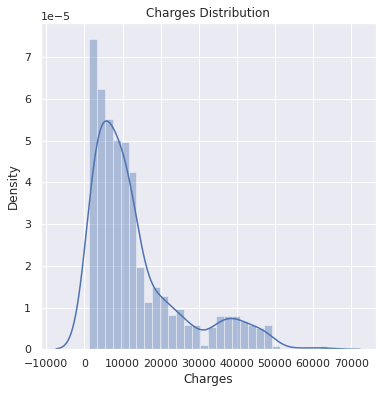

In [95]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Charges'])
plt.title('Charges Distribution')
plt.show()

In [96]:
# encoding sex column
insurance_dataset.replace({'Sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'Smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'Region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [97]:
X = insurance_dataset.drop(columns='Charges', axis=1)
Y = insurance_dataset['Charges']
print(X)
print(Y)

      Age  Sex     BMI  Children  Smoker  Region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: Charges, Length: 1338, dtype: float64


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [99]:
regressor = LinearRegression()


In [100]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [101]:
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)


R squared vale :  0.751505643411174


In [102]:
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [103]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960587


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
